# **Final Project Group 2**

Contributor :
1. Akbar
2. Albert
3. Ari
4. Titan

---

# Introduction

Di era digital saat ini, volume informasi yang tersedia sangat banyak dan seringkali bisa sangat membingungkan, sehingga membuat pengguna kesulitan untuk menemukan rekomendasi yang relevan dan personal. Hal ini terutama berlaku dalam domain rekomendasi restoran, di mana pengguna mencari saran yang sesuai dengan selera dan preferensi mereka. Untuk mengatasi kebutuhan ini, kita dapat mengembangkan sistem rekomendasi restoran yang memanfaatkan cosine similarity, sebuah teknik populer dalam pencarian informasi dan penambangan teks.

## Outline

- Sistem rekomendasi kami akan mengikuti langkah-langkah utama berikut:

    - Pengumpulan dan Prapemrosesan Data: Kami akan mengumpulkan data tentang restoran, termasuk fitur-fitur seperti jenis masakan, lokasi, dan ulasan pengguna. Data ini akan dibersihkan dan dipraproses untuk memastikan cocok untuk analisis.

    - Ekstraksi Fitur: Untuk merepresentasikan restoran dan preferensi pengguna dalam format numerik, kami akan mengekstraksi fitur-fitur relevan dari data tersebut.

    - Perhitungan Cosine Similarity: Kami akan menghitung cosine similarity antara vektor yang merepresentasikan restoran dan preferensi pengguna. Cosine similarity mengukur kosinus sudut antara dua vektor, memberikan metrik untuk kesamaan mereka.

    - Pembuatan Rekomendasi: Berdasarkan skor cosine similarity, kami akan menghasilkan rekomendasi untuk pengguna. Restoran dengan skor kesamaan yang lebih tinggi terhadap preferensi pengguna akan diberi peringkat lebih tinggi dalam daftar rekomendasi.

    - Evaluasi dan Optimasi: Terakhir, kami akan mengevaluasi kinerja sistem rekomendasi kami dan mengeksplorasi potensi optimasi untuk meningkatkan akurasi dan relevansinya.

# i. Import Libraries

In [1]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import re
import nltk
import demoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


from pprint import pprint
# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
demoji.download_codes()

[nltk_data] Downloading package stopwords to C:\Users\M Arindra
[nltk_data]     Jehan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\M Arindra
[nltk_data]     Jehan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\M Arindra
[nltk_data]     Jehan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---

# ii. Data Loading

In [3]:
df = pd.read_csv('TripAdvisor_RestauarantRecommendation.csv')
df.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$


In [4]:
# Cek Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              3062 non-null   object
 1   Street Address    3062 non-null   object
 2   Location          3062 non-null   object
 3   Type              3049 non-null   object
 4   Reviews           3062 non-null   object
 5   No of Reviews     3062 non-null   object
 6   Comments          2447 non-null   object
 7   Contact Number    3062 non-null   object
 8   Trip_advisor Url  3062 non-null   object
 9   Menu              3062 non-null   object
 10  Price_Range       3062 non-null   object
dtypes: object(11)
memory usage: 263.3+ KB


Penjelasan:
- Ada bebrapa kolom yang null value
- 3062 baris dan 11 kolom

**Drop data yang tidak relevant**

In [5]:
df.drop(['Contact Number', 'Trip_advisor Url','Menu'], axis=1, inplace=True)
df.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$


In [6]:
# Cek Data Modus
df.describe(include=['object'])

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
count,3062,3062,3062,3049,3062,3062,2447,3062
unique,2641,2814,2653,669,6,811,2291,6
top,Texas Roadhouse,3333 Bristol St,"Costa Mesa, CA 92626-1873","Italian, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,58 reviews,"The most warn and welcoming environment, Excel...",$$ - $$$
freq,13,8,8,137,1956,18,4,2385


Penjelasan  
- Texas Roadhouse memiliki 13 kali penyebutan dalam reviews/comment

---

 # ii. Data Cleaning

In [7]:
df.isnull().sum()

Name                0
Street Address      0
Location            0
Type               13
Reviews             0
No of Reviews       0
Comments          615
Price_Range         0
dtype: int64

In [8]:
# cek comment
df[df['Comments'].isnull()].head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,$$ - $$$
5,E Tutto Qua,270 Columbus Ave,"San Francisco, CA 94133-4518","Seafood, Italian, Pizza",4.5 of 5 bubbles,"1,406 reviews",NaN,$$ - $$$
16,Malbec,1001 E Green St,"Pasadena, CA 91106-2404","Steakhouse, Latin, Argentinean",4.5 of 5 bubbles,193 reviews,NaN,$$$$
19,Mimi's Cafe,1400 S Harbor Blvd,"Anaheim, CA 92802-2311","American, Cajun & Creole, Vegetarian Friendly",4 of 5 bubbles,"1,807 reviews",NaN,$$ - $$$
23,The Lion's Share,629 Kettner Blvd,"San Diego, CA 92101-6718","American, Bar, Gluten Free Options",4.5 of 5 bubbles,179 reviews,NaN,$$ - $$$


In [9]:
# cek type
df[df['Type'].isnull()].head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
49,Luby's Cafeteria Mall Del Norte,5300 Ih 35,"Laredo, TX",NaN,4 of 5 bubbles,27 reviews,"Located inside the Mall Del Norte, this is a r...",American
267,Very Juice,422 Avenue P,"Brooklyn, NY 11223-1935",NaN,5 of 5 bubbles,1 review,I travel a lot but couldn’t find better Peanut...,Not Specified
1000,Cast Iron Trading Co,114 N San Joaquin St,"Stockton, CA 95202-2407",NaN,4.5 of 5 bubbles,11 reviews,NaN,Not Specified
1238,Sir Winston's Restaurant & Lounge,1126 Queens Hwy,"Long Beach, CA 90802-6331",NaN,4.5 of 5 bubbles,490 reviews,NaN,$$$$
1629,Benji's French Basque Restaurant,4001 Rosedale Hwy,"Bakersfield, CA 93308-6130",NaN,4 of 5 bubbles,157 reviews,NaN,$$ - $$$


In [10]:
# Cek data Reviews dan No of reviews
print(df.Reviews.unique())
display(df[df.Reviews=='No review'])

display(df[df['No of Reviews']=='Undefined Number'])

['4.5 of 5 bubbles' '4 of 5 bubbles' '5 of 5 bubbles' '3.5 of 5 bubbles'
 '3 of 5 bubbles' 'No review']


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


In [11]:
### Drop Rows which are not required and reset index
df = df.drop([1744,2866])
df = df.reset_index(drop=True)

In [12]:
# Kompilasi membersihkan data secara umum

def clean_data(df):

  price_range_map = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
  df['Price_Range'] = df['Price_Range'].map(price_range_map)

  df['Reviews'] = [float(i.split(" ")[0]) for i in df.Reviews]
  df['No of Reviews'] = [int(i.split(" ")[0].replace(",","")) for i in df['No of Reviews']]

  df[['Type1', 'Type2', 'Type3']] = df['Type'].str.split(',', expand=True).apply(lambda x: x.str.strip())

  df[['city', 'state_zip']] = df['Location'].str.rsplit(', ', n=1, expand=True)
  df[['State', 'zip']] = df['state_zip'].str.rsplit(' ', n=1, expand=True)

  df = df[df['State'] != ''].copy()

  df = df.drop('Location', axis=1)
  df = df.drop('zip', axis=1)
  df = df.drop('state_zip', axis=1)
  df.drop_duplicates(inplace=True)

  df.dropna(inplace=True)

  # rename kolom jadi huruf kecil
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.replace(' ', '_')

  return df



In [13]:
df_clean = clean_data(df)

In [14]:
df_clean['state'].unique()

array(['NJ', 'NY', 'TX', 'WA', 'OR', 'PA'], dtype=object)

In [15]:
df_clean['description'] = df_clean['type'] + ' ' + df_clean['comments']

In [16]:
df_clean.shape

(1939, 13)

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 1 to 3059
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1939 non-null   object 
 1   street_address  1939 non-null   object 
 2   type            1939 non-null   object 
 3   reviews         1939 non-null   float64
 4   no_of_reviews   1939 non-null   int64  
 5   comments        1939 non-null   object 
 6   price_range     1939 non-null   float64
 7   type1           1939 non-null   object 
 8   type2           1939 non-null   object 
 9   type3           1939 non-null   object 
 10  city            1939 non-null   object 
 11  state           1939 non-null   object 
 12  description     1939 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 212.1+ KB


Jadi hasil yang kita dapat 1939 restoran

In [18]:
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].str.lower()

In [19]:
df_clean.head()

,name,street_address,type,reviews,no_of_reviews,comments,price_range,type1,type2,type3,city,state,description
1,coach house diner,55 state rt 4,"diner, american, vegetarian friendly",4.0,84,"both times we were there very late, after 11 p...",2.0,diner,american,vegetarian friendly,hackensack,nj,"diner, american, vegetarian friendly both tim..."
2,table talk diner,2521 south rd ste c,"american, diner, vegetarian friendly",4.0,256,waitress was very friendly but a little pricey...,2.0,american,diner,vegetarian friendly,poughkeepsie,ny,"american, diner, vegetarian friendly waitress..."
3,sixty vines,3701 dallas pkwy,"american, wine bar, vegetarian friendly",4.5,235,not sure why i went there for the second time....,2.0,american,wine bar,vegetarian friendly,plano,tx,"american, wine bar, vegetarian friendly not s..."
4,the clam bar,3914 brewerton rd,"american, bar, seafood",4.0,285,doesn't look like much from the outside but wa...,2.0,american,bar,seafood,syracuse,ny,"american, bar, seafood doesn't look like much..."
6,black angus steakhouse - federal way,2400 s 320th st,"american, steakhouse, bar",4.0,220,this is an easy any time place to have dinner!...,2.0,american,steakhouse,bar,federal way,wa,"american, steakhouse, bar this is an easy any..."


---

# iv. Exploratory Data Analysis (EDA)

**A. Top makanan terpopuler berdasarkan type**

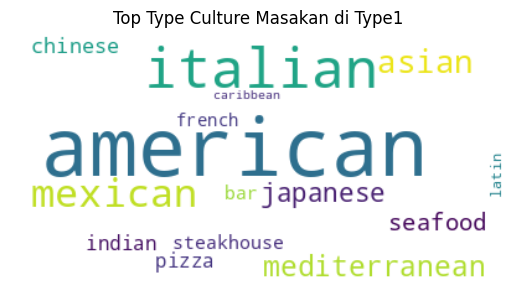

In [20]:
corpus = " ".join(df_clean['type1'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

# Convert the word cloud to an image
img = word_cloud.to_image()

# Plot the word cloud
fig = plt.figure(1)
plt.title('Top Type Culture Masakan di Type1')
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

- Dari plot tersebut, kita dapat melihat bahwa tipe restoran yang paling diminati adalah `american` dan `italian`. Ini dikarenakan beberapa alasan:
    -  Sejumlah besar imigran Italia telah masuk ke Amerika sepanjang abad ke-19 dan ke-20. Oleh karena itu, masuk akal jika budaya kuliner mereka telah diserap dan diadopsi oleh orang Amerika selama bertahun-tahun.
    - Masakan Italia dikaitkan dengan gaya hidup sehat karena menggunakan protein tanpa lemak, sayuran, minyak zaitun, dan berbagai bahan lainnya yang berfokus pada kesehatan. Ini sejalan dengan tren makan sehat saat ini di Amerika Serikat, khususnya di pesisir barat seperti di negara bagian California dan Portland.
    - Pasta dan pizza telah menjadi makanan pokok di seluruh negeri. Berbagai daerah bahkan memiliki spesialisasi mereka sendiri seperti deep dish Chicago atau thin crust New York.

In [21]:
# Buat dataframe
pd.DataFrame({'Jumlah Restoran yang Melayani':df_clean['type1'].value_counts()}).head(10)

,Jumlah Restoran yang Melayani
type1,
american,867
italian,325
mexican,131
asian,84
mediterranean,64
japanese,53
seafood,43
chinese,36
indian,33


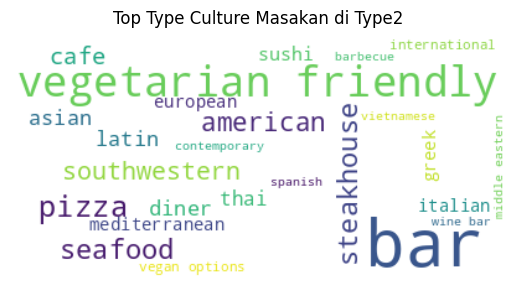

In [22]:
corpus = " ".join(df_clean['type2'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

# Convert the word cloud to an image
img = word_cloud.to_image()

# Plot the word cloud
fig = plt.figure(1)
plt.title('Top Type Culture Masakan di Type2')
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

- `bar` dan `vegetarian friendly` merupakan bagian terbesar dari `Type2`. Alasan untuk ini mungkin:
    - Minum alkohol adalah bagian besar dari budaya Amerika. Alkohol dikonsumsi baik secara rekreasional maupun pada berbagai acara khusus.
    - Sikap kontemporer tentang makanan cenderung ke arah kesehatan. Vegetarianisme dipandang sebagai bagian dari tren ini.
    - Pencarian untuk `vegetarian friendly` juga bisa lebih tinggi karena menjadi kebutuhan bagi para vegetarian.

In [23]:
# Buat dataframe
pd.DataFrame({'Jumlah Restoran yang Melayani':df_clean['type2'].value_counts()}).head(10)

,Jumlah Restoran yang Melayani
type2,
bar,310
vegetarian friendly,307
pizza,126
steakhouse,108
seafood,104
american,93
southwestern,85
cafe,77
latin,58


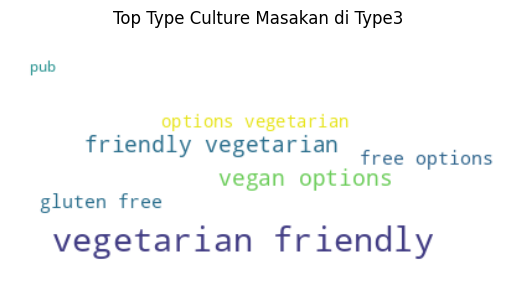

In [24]:
corpus = " ".join(df_clean['type3'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

# Convert the word cloud to an image
img = word_cloud.to_image()

# Plot the word cloud
fig = plt.figure(1)
plt.title('Top Type Culture Masakan di Type3')
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# Buat dataframe
pd.DataFrame({'Jumlah Restoran yang Melayani':df_clean['type3'].value_counts()}).head(10)

,Jumlah Restoran yang Melayani
type3,
vegetarian friendly,707
vegan options,255
gluten free options,184
pub,124
bar,62
seafood,62
asian,54
spanish,36
latin,31


Penjelasan:
- Berdasarkan hasil bahwa top makanan yang memiliki frequency tinggi adalah `American`, `bar` dan `Vegetarian Friendly`

**B. Negara bagian ('State') mana yang memiliki Jumlah Restoran Terbanyak?**

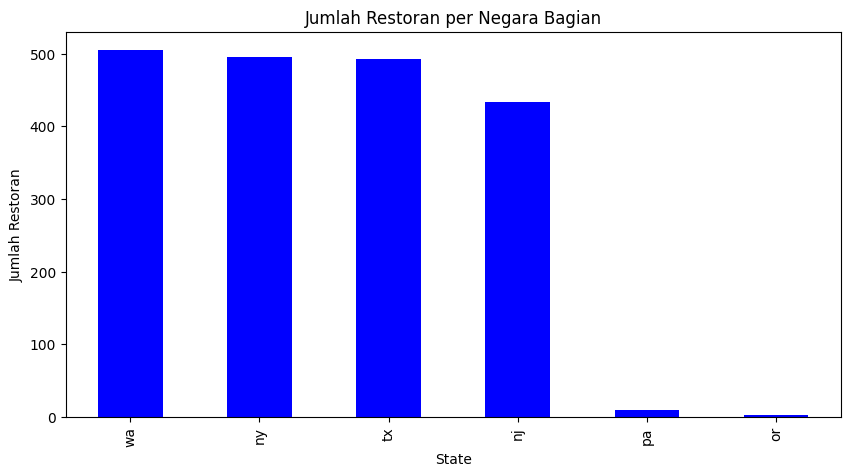

In [26]:
ax = df_clean['state'].value_counts().plot(kind="bar", color="Blue",  figsize=(10,5))

ax.set_ylabel('Jumlah Restoran')
ax.set_xlabel('State')
plot = ax.set_title("Jumlah Restoran per Negara Bagian")

In [27]:
pd.DataFrame({'Jumlah Restoran per Negara Bagian':df_clean['state'].value_counts()}).head(10)

,Jumlah Restoran per Negara Bagian
state,
wa,505
ny,496
tx,493
nj,434
pa,9
or,2


Jumlah Restoran Terbanyak berada di WA diikuti oleh New york

**C. Peringkat restoran terbaik (memberi rating tinggi) dari setiap negara bagian**

Restoran dengan rating tinggi memiliki asumsi 2 faktor:
- Jumlah orang yang me-reviews
- Membering rating tinggi 5

In [28]:
# Menghitung bobot Rating
df_clean['weighted_ratings'] = df_clean['reviews']*df_clean['no_of_reviews']
df_clean['weighted_ratings']

1        336.0
2       1024.0
3       1057.5
4       1140.0
6        880.0
         ...  
3053    1692.0
3055     891.0
3057     844.0
3058     348.0
3059     823.5
Name: weighted_ratings, Length: 1939, dtype: float64

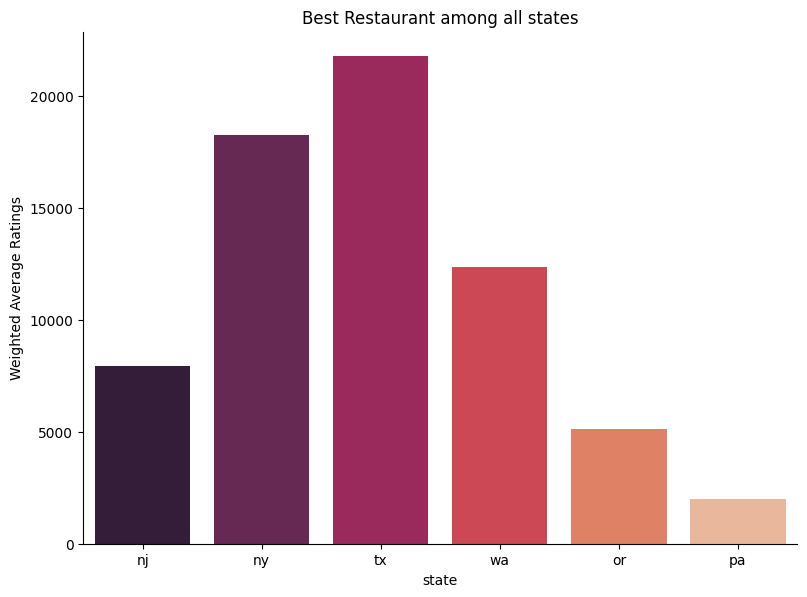

In [29]:
labels = df_clean.state.unique().flatten()
average_vote_share_list = [df_clean[df_clean.state==i].weighted_ratings.max() for i in labels]
avg_wt_ratings = pd.DataFrame({'state':labels, 'Weighted Average Ratings': average_vote_share_list})
plot = sns.catplot(x='state', y="Weighted Average Ratings", kind="bar", data=avg_wt_ratings, palette="rocket")
plt.title("Best Restaurant among all states")
plt.gcf().set_size_inches(9, 6)

In [30]:
df_clean[df_clean.weighted_ratings==df_clean.weighted_ratings.max()]

,name,street_address,type,reviews,no_of_reviews,comments,price_range,type1,type2,type3,city,state,description,weighted_ratings
2164,big texan steak ranch,7701 e interstate 40,"american, steakhouse, southwestern",4.0,5448,roquefort dressing homemade and delicious. i h...,2.0,american,steakhouse,southwestern,amarillo,tx,"american, steakhouse, southwestern roquefort ...",21792.0


`Big Texan Steak Ranch` di Texas dipandang sebagai yang terbaik di antara semua negara bagian. Kita ingin memahami alasannya. Sebagaimana kita telah diskusikan sebelumnya, tidak ada yang mempengaruhi kesuksesan restoran seperti peringkat dari para pengulas.

In [31]:
df_clean[df_clean['no_of_reviews'] == df_clean['no_of_reviews'].max()]

,name,street_address,type,reviews,no_of_reviews,comments,price_range,type1,type2,type3,city,state,description,weighted_ratings
2164,big texan steak ranch,7701 e interstate 40,"american, steakhouse, southwestern",4.0,5448,roquefort dressing homemade and delicious. i h...,2.0,american,steakhouse,southwestern,amarillo,tx,"american, steakhouse, southwestern roquefort ...",21792.0


`Big Texan Steak Ranch` memang menjadi sorotan karena minimnya ulasan yang diberikan, yang pada akhirnya menghasilkan peringkat rata-rata yang tinggi, sekitar 4,0. Kondisi ini menjadikannya restoran yang paling diunggulkan di seluruh negara bagian.

**D. Negara Bagian ('state') Terbaik untuk Makanan?**

Berdasarkan bobot ratings  
'Weighted Ratings - No of Reviewers * Average Ratings'

- Artinya 500 orang yang memberi rata-rata rating 4,0 jauh lebih berpengaruh dibandingkan 200 orang yang memberi rata-rata rating 4,5

- Faktor lain yang mempengaruhi adalah jumlah restoran. Setiap Restoran akan memiliki kumpulan pengulas dan penilaiannya sendiri.

- Oleh karena itu, untuk mendapatkan gambaran keseluruhan yang baik, menambahkan semua peringkat tertimbang menurut negara bagian dan membandingkannya masih merupakan gambaran yang lebih baik




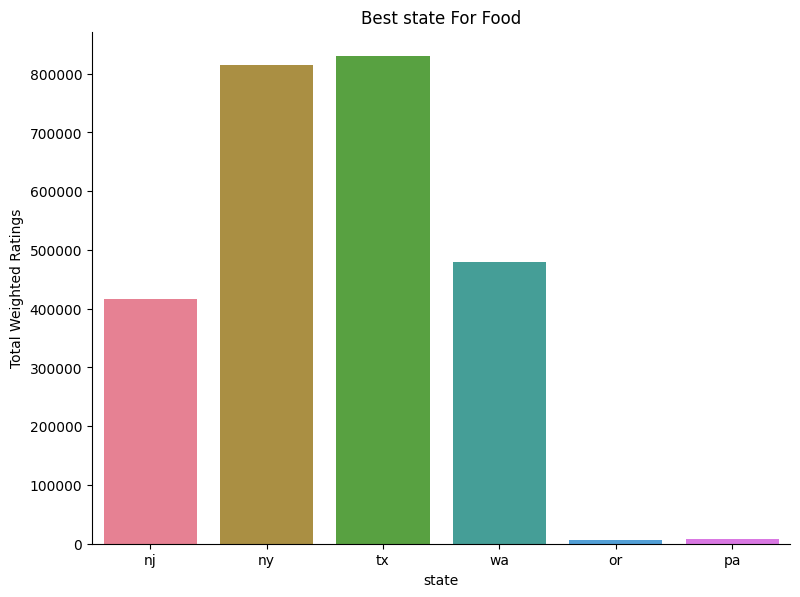

In [32]:
labels = df_clean.state.unique().flatten()
total_vote_share_list = [df_clean[df_clean.state==i].weighted_ratings.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'state':labels, 'Total Weighted Ratings': total_vote_share_list})
plot = sns.catplot(x='state', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="husl")
plt.title("Best state For Food")
plt.gcf().set_size_inches(9, 6)

Dari hasil kita dapatkan dengan mempertimbangkan Weighted Ratings dan jumlah restoran, kami menjadikan New York sebagai negara bagian terbaik secara keseluruhan untuk makanan, diikuti Texas.

**E. Kota Terbaik untuk Makanan?**

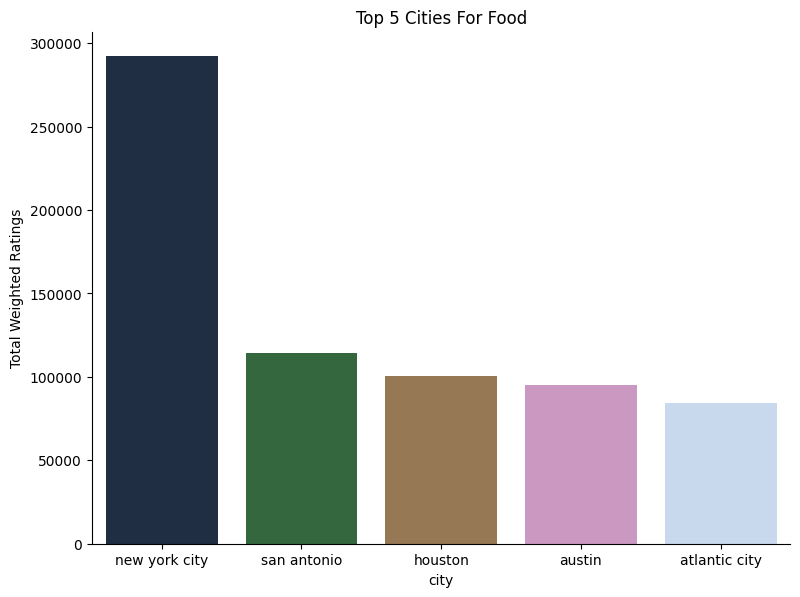

In [33]:
labels = df_clean.city.unique().flatten()
total_vote_share_list = [df_clean[df_clean.city==i].weighted_ratings.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'city':labels, 'Total Weighted Ratings': total_vote_share_list})
total_wt_ratings = total_wt_ratings.sort_values(by=['Total Weighted Ratings'],ascending=False).head(5)
plot = sns.catplot(x='city', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="cubehelix")
plt.title("Top 5 Cities For Food")
plt.gcf().set_size_inches(9, 6)

Kota New York sejauh ini merupakan kota terbaik untuk makanan berdasarkan Weighted Ratings

**F. Distribusi Price Range**

price_range
2.0    1535
3.0     248
1.0     156
Name: count, dtype: int64


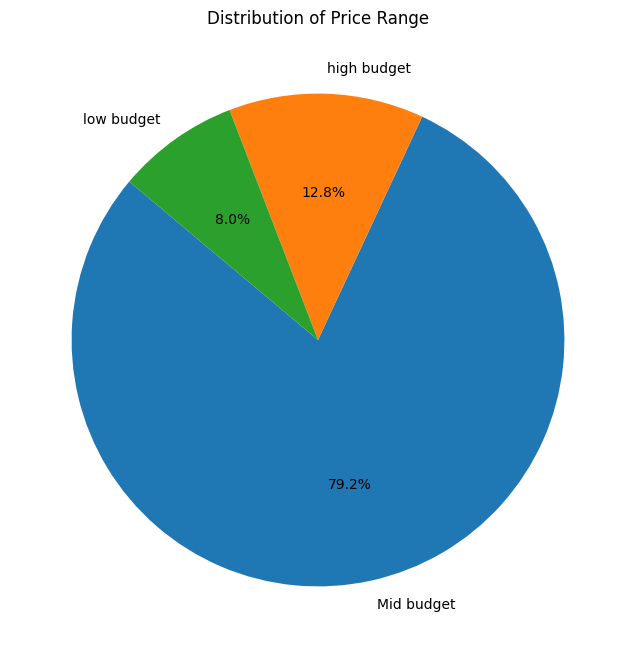

In [34]:
# Menghitung jumlah setiap kategori dalam kolom 'price_range'
price_range_counts = df_clean['price_range'].value_counts()
print(price_range_counts)

labels = {1.0:'low budget', 2.0:'Mid budget', 3.0:'high budget'}

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=price_range_counts.index.map(labels), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Price Range')
plt.show()

Dari hasil di dapat bahwa budget medium adalah yang mendominasi dataset ini

---

In [35]:
df_clean.head()

,name,street_address,type,reviews,no_of_reviews,comments,price_range,type1,type2,type3,city,state,description,weighted_ratings
1,coach house diner,55 state rt 4,"diner, american, vegetarian friendly",4.0,84,"both times we were there very late, after 11 p...",2.0,diner,american,vegetarian friendly,hackensack,nj,"diner, american, vegetarian friendly both tim...",336.0
2,table talk diner,2521 south rd ste c,"american, diner, vegetarian friendly",4.0,256,waitress was very friendly but a little pricey...,2.0,american,diner,vegetarian friendly,poughkeepsie,ny,"american, diner, vegetarian friendly waitress...",1024.0
3,sixty vines,3701 dallas pkwy,"american, wine bar, vegetarian friendly",4.5,235,not sure why i went there for the second time....,2.0,american,wine bar,vegetarian friendly,plano,tx,"american, wine bar, vegetarian friendly not s...",1057.5
4,the clam bar,3914 brewerton rd,"american, bar, seafood",4.0,285,doesn't look like much from the outside but wa...,2.0,american,bar,seafood,syracuse,ny,"american, bar, seafood doesn't look like much...",1140.0
6,black angus steakhouse - federal way,2400 s 320th st,"american, steakhouse, bar",4.0,220,this is an easy any time place to have dinner!...,2.0,american,steakhouse,bar,federal way,wa,"american, steakhouse, bar this is an easy any...",880.0


# Feature Enginering

Tujuan kita adalah membuat sistem rekomendasi berdasarkan Content-base-filtering, target kita adalah nama restoran dan feature adalah description dimana dari hasil comments + type

In [36]:
pprint(df_clean['description'].to_list())

[' diner, american, vegetarian friendly both times we were there very late, '
 'after 11 pm.  at that time in many diners (forget restaurants!) you get '
 'warmed-over food and lousy service.  not so here - food was uniformly very '
 "good and the service quite good.  there weren't many people but it...more",
 ' american, diner, vegetarian friendly waitress was very friendly but a '
 'little pricey for a diner but the food was delicious \n'
 'the menu had a wide variety of foods to choose from but any choice would '
 'have been a good one',
 ' american, wine bar, vegetarian friendly not sure why i went there for the '
 'second time. will not go again. not because it was terrible but because it '
 'is just average.  \n'
 'the place needs a food clean .... our menus were filthy...the table was '
 'filthy \n'
 'it is impossible to have a...more',
 " american, bar, seafood doesn't look like much from the outside but walk in "
 'either the front door or back door and get greeted and sat alm

In [37]:
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Penghapusan Mention
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    # Penghapusan Hashtag
    text = re.sub(r'#', '', text)

    # Penghapusan Emoji
    text = demoji.replace(text, "")

    # Penghapusan Karakter Newline
    text = text.replace('\n', ' ')

    # Penghapusan Angka
    text = re.sub(r'\d+', '', text)

    # Penghapusan White Space Tambahan
    text = re.sub(r'\s+', ' ', text)

    # Pembersihan Teks Tambahan
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenisasi
    tokens = word_tokenize(text)

    # Pembersihan Teks
    tokens = [word for word in tokens if word.isalnum()]

    # Penghapusan Stopword
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

def cleaner(data):
    data['text_preprocessed'] = data['description'].apply(clean_text)
    return data


In [38]:
cleaner(df_clean)
df_clean.head()

,name,street_address,type,reviews,no_of_reviews,comments,price_range,type1,type2,type3,city,state,description,weighted_ratings,text_preprocessed
1,coach house diner,55 state rt 4,"diner, american, vegetarian friendly",4.0,84,"both times we were there very late, after 11 p...",2.0,diner,american,vegetarian friendly,hackensack,nj,"diner, american, vegetarian friendly both tim...",336.0,diner american vegetarian friendli time late p...
2,table talk diner,2521 south rd ste c,"american, diner, vegetarian friendly",4.0,256,waitress was very friendly but a little pricey...,2.0,american,diner,vegetarian friendly,poughkeepsie,ny,"american, diner, vegetarian friendly waitress...",1024.0,american diner vegetarian friendli waitress fr...
3,sixty vines,3701 dallas pkwy,"american, wine bar, vegetarian friendly",4.5,235,not sure why i went there for the second time....,2.0,american,wine bar,vegetarian friendly,plano,tx,"american, wine bar, vegetarian friendly not s...",1057.5,american wine bar vegetarian friendli sure wen...
4,the clam bar,3914 brewerton rd,"american, bar, seafood",4.0,285,doesn't look like much from the outside but wa...,2.0,american,bar,seafood,syracuse,ny,"american, bar, seafood doesn't look like much...",1140.0,american bar seafood doesnt look like much out...
6,black angus steakhouse - federal way,2400 s 320th st,"american, steakhouse, bar",4.0,220,this is an easy any time place to have dinner!...,2.0,american,steakhouse,bar,federal way,wa,"american, steakhouse, bar this is an easy any...",880.0,american steakhous bar easi time place dinner ...


In [39]:
pprint(df_clean['text_preprocessed'].to_list())

['diner american vegetarian friendli time late pm time mani diner forget '
 'restaur get warmedov food lousi servic food uniformli good servic quit good '
 'werent mani peopl itmor',
 'american diner vegetarian friendli waitress friendli littl pricey diner food '
 'delici menu wide varieti food choos choic would good one',
 'american wine bar vegetarian friendli sure went second time go terribl '
 'averag place need food clean menu filthyth tabl filthi imposs amor',
 'american bar seafood doesnt look like much outsid walk either front door '
 'back door get greet sat almost immedi waitress amaz help larg varieti offer '
 'wife satisfiedmor',
 'american steakhous bar easi time place dinner week night special occas food '
 'reason price alway delici',
 'mediterranean greek healthi husband went greec last fall fell love beauti '
 'food dalla busi trip came across ziziki thought wed give go know riski '
 'weeksmor',
 'italian pizza vegetarian friendli love vinc pizza neighborhood meet smal

In [40]:
for i in list(np.random.randint(0,len(df_clean),1)):
    print('Original: ', df_clean.iloc[i,7])
    print('Preprocessed: ', df_clean.iloc[i,8])
    print('-'*50)

Original:  american
Preprocessed:  bar
--------------------------------------------------


In [41]:
for i in list(np.random.randint(0,len(df_clean),1)):
    print('Original: ', df_clean.iloc[i,7])
    print('Preprocessed: ', df_clean.iloc[i,8])
    print('-'*50)

Original:  japanese
Preprocessed:  sushi
--------------------------------------------------


In [42]:
df_clean.to_csv('trip_clean.csv', index=False)
data_dump = df_clean.copy()

---

# v. Building a Recommender System

In [43]:
def get_recommendations(restaurant_type=None, comments=None, city=None, state=None, price=None, num_recommendations=5):
    # Filter restaurants based on multiple inputs
    filtered_restaurants = df_clean.copy()
    if restaurant_type:
        filtered_restaurants = filtered_restaurants[filtered_restaurants['type1'] == restaurant_type]
    if comments:
        filtered_restaurants = filtered_restaurants[filtered_restaurants['comments'].str.contains(comments)]
    if city:
        filtered_restaurants = filtered_restaurants[filtered_restaurants['city'] == city]
    if state:
        filtered_restaurants = filtered_restaurants[filtered_restaurants['state'] == state]
    if price:
        filtered_restaurants = filtered_restaurants[filtered_restaurants['price_range'].isin(price)]

    # Create a new TfidfVectorizer instance
    tfidf_filtered = TfidfVectorizer()
    
    # Fit and transform the filtered data
    tfidf_matrix_filtered = tfidf_filtered.fit_transform(filtered_restaurants['text_preprocessed'])
    
    # Calculate cosine similarity between the filtered restaurants
    cosine_sim_filtered = cosine_similarity(tfidf_matrix_filtered)
    
    # Get the average similarity score for each restaurant
    avg_sim_scores = cosine_sim_filtered.mean(axis=0)
    
    # Get the top N most similar restaurants
    top_recommendations = avg_sim_scores.argsort()[:-num_recommendations-1:-1]
    
    # List of output column to display
    output_col = ['name','street_address','city','state']

    # Update output column into the dataset
    filtered_restaurants = filtered_restaurants[output_col]

    # Create output of the recommended restaurant information
    output = filtered_restaurants.iloc[top_recommendations]

    # Reset the index and drop the old index
    output = output.reset_index(drop=True)

    # Set the index to a new range starting from 1
    output.index = range(1, len(output)+1)

    # Return output
    return output

In [44]:
# # Example usage:
# restaurant_type = input("Enter restaurant type: ")
# comments = input("Enter keywords or phrases to search for in comments: ")
# city = input("Enter city: ")
# state = input("Enter state: ")

# recommendations = get_recommendations(restaurant_type, comments, city, state, num_recommendations=5)
# display(recommendations)

In [46]:
def chatbot():
    print("Welcome to the Restaurant Recommendation Chatbot!")
    while True:
        query = input("Press 'Enter' to search restaurant or type 'Quit' to exit: ")
        if query.lower() == 'quit':
            break
        else :
            restaurant_type = input("Enter restaurant type: ")
            comments = input("Enter restaurant ambiance: ")
            city = input("Enter city: ")
            state = input("Enter state: ")
            price = input("Enter price range from 1 to 3: ")
            price_list = [int(x) for x in price.split(',')]
            num_recommendations = int(input("Enter number of recommended restaurant to display: "))
            # confirm = input("Is this correct? (yes/no): ")
            # if confirm.lower() == 'yes':
            #     break
            # else:
            #     print("Please re-enter the information.")
        try:
            recommendations = get_recommendations(restaurant_type, comments, city, state, price_list, num_recommendations)
            print("You might like:")
            display(recommendations)
        except Exception:
            print("Sorry, I couldn't find any recommendations for that restaurant.")
        # except Exception as e:
        #     print("An error occurred:", str(e))

if __name__ == "__main__":
    chatbot()

Welcome to the Restaurant Recommendation Chatbot!
You might like:


,name,street_address,city,state
1,federici's pizzeria,14 e main st,freehold,nj
2,mambo italiano cafe,1303 12th st,bellingham,wa
3,ah' pizz,7 n willow st,montclair,nj
4,authentic new york pizza company,5838 s staples st,corpus christi,tx
5,crust pizza co.,4775 w panther creek dr,spring,tx
